In [1]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

2023-11-19 15:25:29.569536: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2023-11-19 15:25:47--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 2606:4700:20::681a:221, 2606:4700:20::681a:321, 2606:4700:20::ac43:4695, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|2606:4700:20::681a:221|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: 'insurance.csv'

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.01s   

2023-11-19 15:25:47 (4.01 MB/s) - 'insurance.csv' saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [89]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame
label_encoder = LabelEncoder()
dataset['sex'] = label_encoder.fit_transform(dataset['sex'])
dataset['smoker'] = label_encoder.fit_transform(dataset['smoker'])
dataset['region'] = label_encoder.fit_transform(dataset['region'])

In [90]:
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]
print(x)
print(y)

      age  sex   bmi  children  smoker  region
0      19    0  27.9         0       1       3
1      18    1  33.8         1       0       2
2      28    1  33.0         3       0       2
3      33    1  22.7         0       0       1
4      32    1  28.9         0       0       1
...   ...  ...   ...       ...     ...     ...
1333   50    1  31.0         3       0       1
1334   18    0  31.9         0       0       0
1335   18    0  36.9         0       0       2
1336   21    0  25.8         0       0       3
1337   61    0  29.1         0       1       1

[1338 rows x 6 columns]
0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64


In [107]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
x=ss.fit_transform(x)
# Assuming 'x' and 'y' are your features and labels
train_dataset, test_dataset, train_labels, test_labels = train_test_split(x, y, test_size=0.2, random_state=42)


In [108]:

normalizer = layers.experimental.preprocessing.Normalization()
model=keras.Sequential(
[
    normalizer,
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='relu'),
    
])

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss='mae',metrics=['mae','mse'])

# Train the model
model.fit(train_dataset, train_labels, epochs=100, batch_size=32, validation_data=(test_dataset, test_labels))


Epoch 1/100
34/34 [==============================] - 1s 5ms/step - loss: 11329.5938 - mae: 11329.5938 - mse: 269231520.0000 - val_loss: 7649.7876 - val_mae: 7649.7876 - val_mse: 131397080.0000
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 4784.2607 - mae: 4784.2607 - mse: 73426240.0000 - val_loss: 3279.4387 - val_mae: 3279.4387 - val_mse: 38409248.0000
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 3456.0796 - mae: 3456.0796 - mse: 42801368.0000 - val_loss: 3090.2930 - val_mae: 3090.2930 - val_mse: 37202028.0000
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 3229.8633 - mae: 3229.8633 - mse: 40572280.0000 - val_loss: 2958.3013 - val_mae: 2958.3013 - val_mse: 32916156.0000
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 3001.3547 - mae: 3001.3547 - mse: 36010960.0000 - val_loss: 2692.6494 - val_mae: 2692.6494 - val_mse: 30936622.0000
Epoch 6/100
34/34 [==============================] 

34/34 [==============================] - 0s 2ms/step - loss: 2077.2986 - mae: 2077.2986 - mse: 24705430.0000 - val_loss: 1746.6534 - val_mae: 1746.6534 - val_mse: 20561976.0000
Epoch 45/100
34/34 [==============================] - 0s 2ms/step - loss: 2039.7385 - mae: 2039.7385 - mse: 24484520.0000 - val_loss: 1832.6234 - val_mae: 1832.6234 - val_mse: 20862322.0000
Epoch 46/100
34/34 [==============================] - 0s 2ms/step - loss: 2046.3177 - mae: 2046.3177 - mse: 24542008.0000 - val_loss: 1754.5577 - val_mae: 1754.5577 - val_mse: 20102388.0000
Epoch 47/100
34/34 [==============================] - 0s 2ms/step - loss: 2005.0815 - mae: 2005.0815 - mse: 24555762.0000 - val_loss: 1741.1985 - val_mae: 1741.1985 - val_mse: 20243358.0000
Epoch 48/100
34/34 [==============================] - 0s 2ms/step - loss: 2008.3740 - mae: 2008.3740 - mse: 24667320.0000 - val_loss: 1806.6681 - val_mae: 1806.6681 - val_mse: 20862930.0000
Epoch 49/100
34/34 [==============================] - 0s 2ms/st

34/34 [==============================] - 0s 2ms/step - loss: 1830.5615 - mae: 1830.5615 - mse: 23145624.0000 - val_loss: 1570.6161 - val_mae: 1570.6161 - val_mse: 19341492.0000
Epoch 88/100
34/34 [==============================] - 0s 2ms/step - loss: 1806.1708 - mae: 1806.1708 - mse: 22792152.0000 - val_loss: 1672.2660 - val_mae: 1672.2660 - val_mse: 19611036.0000
Epoch 89/100
34/34 [==============================] - 0s 2ms/step - loss: 1873.4561 - mae: 1873.4561 - mse: 22728728.0000 - val_loss: 1551.4318 - val_mae: 1551.4318 - val_mse: 18514966.0000
Epoch 90/100
34/34 [==============================] - 0s 2ms/step - loss: 1791.2156 - mae: 1791.2156 - mse: 22940680.0000 - val_loss: 1495.1394 - val_mae: 1495.1394 - val_mse: 18886196.0000
Epoch 91/100
34/34 [==============================] - 0s 2ms/step - loss: 1794.6399 - mae: 1794.6399 - mse: 23044622.0000 - val_loss: 1557.3002 - val_mae: 1557.3002 - val_mse: 19121498.0000
Epoch 92/100
34/34 [==============================] - 0s 2ms/st

9/9 - 0s - loss: 1477.2012 - mae: 1477.2012 - mse: 19259374.0000 - 26ms/epoch - 3ms/step
Testing set Mean Abs Error: 1477.20 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 1ms/step


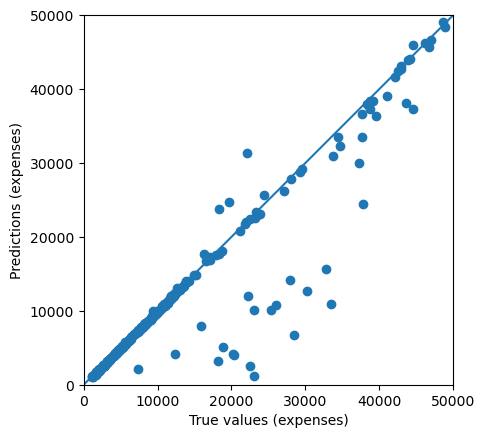

In [109]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse= model.evaluate(test_dataset,test_labels, verbose=2)
print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))
if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
